In this project I will attempt to classify Yelp reviews into star categories beased on the text content in the review itself. I'll be doing this using Natural Language Processing techniques in python.
The dataset: https://www.kaggle.com/c/yelp-recsys-2013

In [1]:
from pyforest import *

In [2]:
yelp = pd.read_csv('yelp.csv')
yelp.head()

<IPython.core.display.Javascript object>

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [3]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [4]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [15]:
yelp['txt_len'] = yelp['text'].apply(len)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

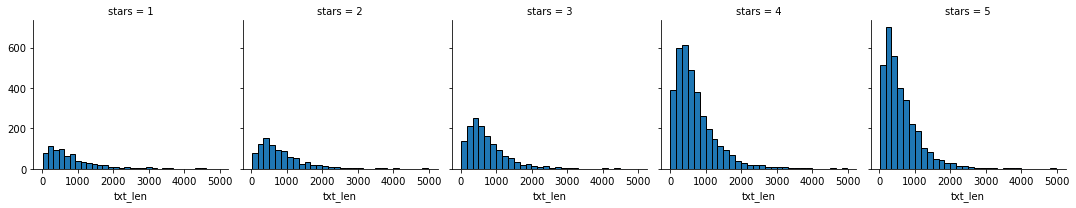

In [22]:
g = sns.FacetGrid(data = yelp, col='stars')
g.map(plt.hist, 'txt_len', bins=30, ec='black')

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='stars', ylabel='txt_len'>

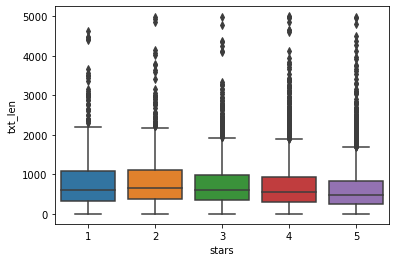

In [24]:
sns.boxplot(x='stars', y='txt_len', data = yelp)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='stars', ylabel='count'>

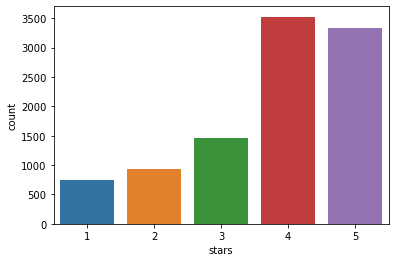

In [30]:
sns.countplot(x = 'stars', data = yelp)

In [41]:
stars =yelp.groupby('stars').mean()

In [42]:
stars

,cool,useful,funny,txt_len
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [43]:
stars.corr()

,cool,useful,funny,txt_len
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
txt_len,-0.857664,0.699881,0.843461,1.000000


<IPython.core.display.Javascript object>

<AxesSubplot:>

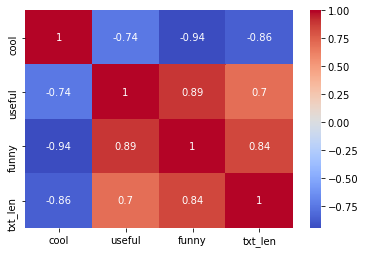

In [48]:
sns.heatmap(stars.corr(), cmap='coolwarm', annot=True)

To make this easier to start, I will only take the reviews that are either 1 star or 5 star.

In [76]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]

In [78]:
X = yelp_class['text']
y = yelp_class['stars']

In [79]:
from sklearn.feature_extraction.text import CountVectorizer

In [80]:
countV = CountVectorizer()

In [81]:
X = countV.fit_transform(X)

In [84]:
X.shape

(4086, 19183)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

<IPython.core.display.Javascript object>

In [88]:
from sklearn.naive_bayes import MultinomialNB

In [89]:
nb = MultinomialNB()

In [90]:
nb.fit(X_train, y_train)

MultinomialNB()

In [91]:
pred = nb.predict(X_test)

In [92]:
from sklearn.metrics import confusion_matrix, classification_report

In [94]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[159  69]
 [ 22 976]]
              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



In [95]:
from sklearn.feature_extraction.text import TfidfTransformer

In [96]:
from sklearn.pipeline import Pipeline

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [116]:
from sklearn.linear_model import LogisticRegression

In [123]:
pipeline = Pipeline([('bow', CountVectorizer()),
                    ('bayes', LogisticRegression(max_iter=999999))
                    ])

In [125]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

<IPython.core.display.Javascript object>

In [126]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()),
                ('bayes', LogisticRegression(max_iter=999999))])

In [127]:
pred = pipeline.predict(X_test)

In [128]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[175  53]
 [ 26 972]]
              precision    recall  f1-score   support

           1       0.87      0.77      0.82       228
           5       0.95      0.97      0.96       998

    accuracy                           0.94      1226
   macro avg       0.91      0.87      0.89      1226
weighted avg       0.93      0.94      0.93      1226



Looks like we were able to make some improvements with logistic regression